# WeatherPy - Conclusions

### The data sugests the following:

1. There is a stronger correlation between latitudes and temperatures in the northern hemisphere compared to the southern hemisphere. Caution is warranted in drawing this conclusion as it may be biased based on the number of southern hemisphere cities that our program randomly drew.
2. It appears as though latitude has little to no impact on wind speed across all cities sampled.
3. It appears that cloudiness is not significantly impacted by either latitude or temperature.


---
# Code

In [1]:
pip install citipy

     |████████████████████████████████| 557 kB 3.8 MB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=7535d04163c0251896f95ed9bc5804e5a58b0bcffaaa8939bcb1364e5fedb8a5
  Stored in directory: /Users/seidy/Library/Caches/pip/wheels/6d/df/5e/ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
import scipy.stats as stats

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

In [3]:
cities_df = pd.DataFrame(data=cities)
cities_df

,0
0,taolanaro
1,mar del plata
2,tuktoyaktuk
3,verkh-usugli
4,hilo
...,...
637,shizunai
638,tsihombe
639,flinders
640,hammerfest


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# list of cities = cities

In [8]:
# creating empty lists to be appended into
names =[]
countries = []
latitudes = []
longitudes = []
temperatures = []
humidities = []
wind_speeds = []
cloudiness = []

# creating record counter variable for print functions
record = 0

base_url = "http://api.openweathermap.org/data/2.5/weather?"

print(f"Beginning Data Retrieval\n-------------------------")
for city in cities:
    params= {"q":city, "appid":weather_api_key, "units":"imperial"}
    weather_response = requests.get(url=base_url, params=params)
    weather_json = weather_response.json()

    try:
        names.append(weather_json["name"])
        countries.append(weather_json["sys"]["country"])
        latitudes.append(weather_json["coord"]["lat"])
        longitudes.append(weather_json["coord"]["lon"])
        temperatures.append(weather_json["main"]["temp"])
        humidities.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])    # gives the % of cloudiness reading
        wind_speeds.append(weather_json["wind"]["speed"])
        record = record + 1
        print(f"Processing Record {record} of Set | {city}")

    except:
        print(f"City {city} not found. Skipping...")
print(f"-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-------------------------
City taolanaro not found. Skipping...
Processing Record 1 of Set | mar del plata
Processing Record 2 of Set | tuktoyaktuk
Processing Record 3 of Set | verkh-usugli
Processing Record 4 of Set | hilo
Processing Record 5 of Set | klaksvik
Processing Record 6 of Set | christchurch
Processing Record 7 of Set | batagay-alyta
Processing Record 8 of Set | deputatskiy
Processing Record 9 of Set | puerto ayora
Processing Record 10 of Set | bredasdorp
Processing Record 11 of Set | vao
Processing Record 12 of Set | cap malheureux
Processing Record 13 of Set | eenhana
Processing Record 14 of Set | ribeira grande
Processing Record 15 of Set | lander
Processing Record 16 of Set | rikitea
Processing Record 17 of Set | kirakira
City belushya guba not found. Skipping...
Processing Record 18 of Set | barrow
City sug-aksy not found. Skipping...
City attawapiskat not found. Skipping...
Processing Record 19 of Set | georgetown
Processing Record 20 of Set | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# creating dictionary of lists to input into dataframe
data = {
    "City":names, 
    "Country":countries, 
    "Latitude":latitudes, 
    "Longitude":longitudes, 
    "Temperature":temperatures, 
    "Humidity":humidities,
    "Wind Speed":wind_speeds,
    "Cloudiness %":cloudiness
}

In [16]:
# creating dataframe and showing head and tail
city_temps_df = pd.DataFrame(data=data)
city_temps_df

,City,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness %
0,Mar del Plata,AR,-38.0023,-57.5575,63.16,77,12.66,75
1,Tuktoyaktuk,CA,69.4541,-133.0374,-23.80,76,2.35,75
2,Verkh-Usugli,RU,52.7000,115.1667,-23.51,82,3.31,74
3,Hilo,US,19.7297,-155.0900,73.58,61,10.36,20
4,Klaksvík,FO,62.2266,-6.5890,21.20,93,2.30,96
...,...,...,...,...,...,...,...,...
587,Ukiah,US,39.1502,-123.2078,53.60,62,6.91,90
588,Shizunai-furukawachō,JP,42.3339,142.3669,29.71,90,7.36,20
589,Flinders,AU,-34.5833,150.8552,78.31,72,4.00,67
590,Hammerfest,NO,70.6634,23.6821,26.60,86,11.50,75


In [17]:
# count of values per column
city_temps_df.count()

City            592
Country         592
Latitude        592
Longitude       592
Temperature     592
Humidity        592
Wind Speed      592
Cloudiness %    592
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
# check for max humidity reading using .max
city_temps_df.max()

City            Östersund
Country                ZW
Latitude          78.2186
Longitude        179.3167
Temperature       93.2000
Humidity              100
Wind Speed        55.9200
Cloudiness %          100
dtype: object

In [22]:
# check for max humidity reading by sorting values
city_temps_df.sort_values(by="Humidity", ascending=False)

,City,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness %
84,Ucluelet,CA,48.9329,-125.5528,42.28,100,5.75,90
175,Puerto Nariño,CO,-3.7703,-70.3831,75.20,100,4.61,90
446,Port Hedland,AU,-20.3167,118.5667,77.00,100,24.16,90
282,Karasjok,NO,69.4719,25.5112,19.40,100,8.05,90
44,Airai,TL,-8.9266,125.4092,62.74,100,4.47,100
...,...,...,...,...,...,...,...,...
547,Broken Hill,AU,-31.9500,141.4333,82.40,20,10.36,85
502,Monclova,MX,26.9000,-101.4167,69.37,19,9.06,1
506,Diré,ML,12.2833,-10.9667,70.84,19,1.57,19
464,Bouna,CI,9.2667,-3.0000,75.51,19,5.28,2


In [23]:
# check for max humidity using summary statistics
city_temps_df.describe()

,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness %
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,20.606839,17.044848,48.410574,73.989865,8.278564,56.375000
std,32.954514,89.865432,32.310176,19.291071,6.343860,40.627622
min,-54.800000,-175.200000,-49.940000,15.000000,0.340000,0.000000
25%,-5.024750,-65.754425,27.655000,65.000000,3.610000,10.000000
50%,25.189950,23.550000,60.755000,78.500000,6.780000,75.000000
75%,47.342975,93.917850,74.417500,88.000000,11.500000,98.000000
max,78.218600,179.316700,93.200000,100.000000,55.920000,100.000000


Since no cities have a humidity reading over 100%, this step will be skipped.

In [24]:
# Export the City_Data into a csv
city_temps_df.to_csv("../output_data/city_temps.csv")

# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [26]:
city_temps_df.columns

Index(['City', 'Country', 'Latitude', 'Longitude', 'Temperature', 'Humidity',
       'Wind Speed', 'Cloudiness %'],
      dtype='object')

In [27]:
# creating variables to use as x/y data in scatter plots
lat_scatter = city_temps_df["Latitude"]
temp_scatter = city_temps_df["Temperature"]
humi_scatter = city_temps_df["Humidity"]
cloud_scatter = city_temps_df["Cloudiness %"]
wind_scatter = city_temps_df["Wind Speed"]

## Latitude vs. Temperature Plot

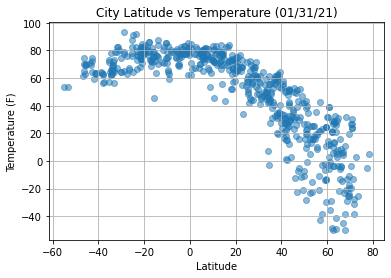

In [39]:
plt.scatter(lat_scatter,temp_scatter, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs Temperature (01/31/21)")
plt.grid()

plt.savefig("../output_data/latitude_vs_temperature.png")
plt.show()

## Latitude vs. Humidity Plot

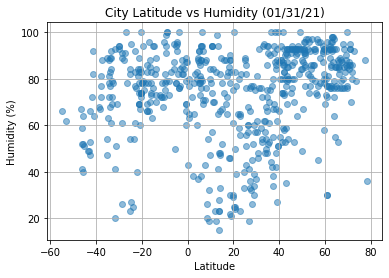

In [40]:
plt.scatter(lat_scatter,humi_scatter, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (01/31/21)")
plt.grid()

plt.savefig("../output_data/latitude_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

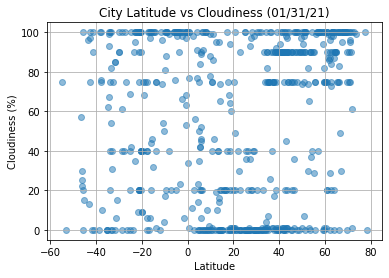

In [41]:
plt.scatter(lat_scatter,cloud_scatter, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (01/31/21)")
plt.grid()

plt.savefig("../output_data/latitude_vs_cloudiness.png")
plt.show()

## Temperature vs. Cloudiness Plot

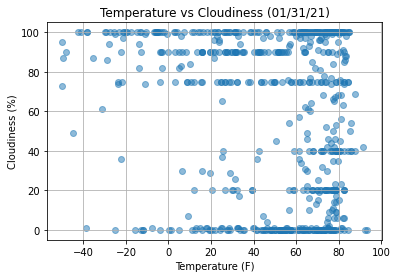

In [163]:
plt.scatter(temp_scatter,cloud_scatter, alpha=0.5)
plt.xlabel("Temperature (F)")
plt.ylabel("Cloudiness (%)")
plt.title("Temperature vs Cloudiness (01/31/21)")
plt.grid()

plt.savefig("../output_data/temperature_vs_cloudiness.png")
plt.show()

## Temperature vs. Humidity Plot

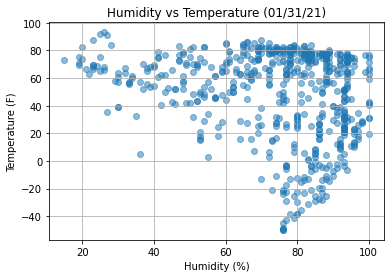

In [165]:
plt.scatter(humi_scatter,temp_scatter, alpha=0.5)
plt.ylabel("Temperature (F)")
plt.xlabel("Humidity (%)")
plt.title("Humidity vs Temperature (01/31/21)")
plt.grid()

plt.savefig("../output_data/humid_vs_temp.png")
plt.show()

## Latitude vs. Wind Speed Plot

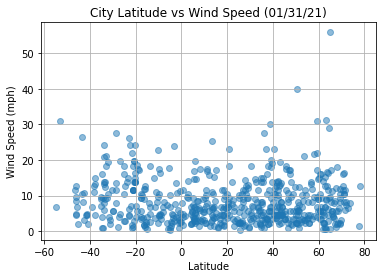

In [42]:
plt.scatter(lat_scatter,wind_scatter, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (01/31/21)")
plt.grid()

plt.savefig("../output_data/latitude_vs_windspeed.png")
plt.show()

## Linear Regression

In [147]:
# creating function with defined arguments to make the linear regression for all plots faster
def line_regress(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)  
    
    regress_values = x * slope + intercept

    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x, y)
    plt.plot(x, regress_values,color= "red")   
    plt.annotate(line_equation, (0,50), fontsize=15,color="red", annotation_clip=False)

    
    print(line_equation)
    print(f"The r squared is {rvalue}")

In [44]:
# boolean variables to create northern and southern dataframes 
is_northern = city_temps_df["Latitude"] >= 0
is_southern = city_temps_df["Latitude"] < 0

In [58]:
# northern hemisphere dataframe

northern_hem_df = city_temps_df.loc[is_northern]
assert northern_hem_df["Latitude"].min() >= 0     # check that all lats are greater than or equal to 0

In [59]:
# southern hemisphere
southern_hem_df = city_temps_df.loc[is_southern]
assert southern_hem_df["Latitude"].max() < 0    # check that all lats are less than 0

In [62]:
# northern variables
north_lats = northern_hem_df["Latitude"]
north_temp = northern_hem_df["Temperature"]
north_humi = northern_hem_df["Humidity"]
north_wind = northern_hem_df["Wind Speed"]
north_cloud = northern_hem_df["Cloudiness %"]

# southern variables
south_lats = southern_hem_df["Latitude"]
south_temp = southern_hem_df["Temperature"]
south_humi = southern_hem_df["Humidity"]
south_wind = southern_hem_df["Wind Speed"]
south_cloud = southern_hem_df["Cloudiness %"]

---
# Northern vs Southern - Latitude vs Temperature

#### Based on the linear regressions and scatter plots showcased below, we can draw the following conclusions:
    1. There is a strong negative correlation between latitude and temperature, meaning the farther south you travel, the hotter the temperature is.
    2. There appears to be a stronger correlation between latitudes and temperatures in the northern hemisphere compared to the southern hemisphere as showcased by their respective r squared values.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.36x + 89.75
The r squared is -0.8534579983708654


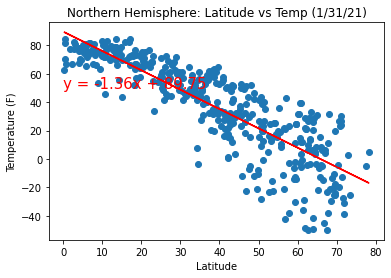

In [162]:
line_regress(north_lats, north_temp)
plt.title("Northern Hemisphere: Latitude vs Temp (1/31/21)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig("../output_data/north_lat_vs_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.3x + 80.29
The r squared is 0.4750136511464984


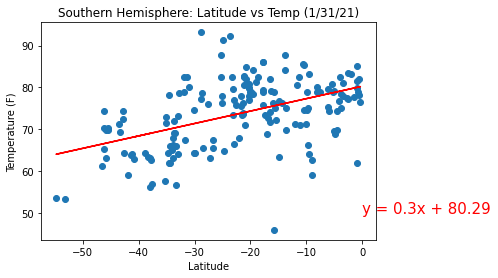

In [161]:
line_regress(south_lats, south_temp)
plt.title("Southern Hemisphere: Latitude vs Temp (1/31/21)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig("../output_data/south_lat_vs_temp.png")
plt.show()

---
# Northern vs Southern - Latitude vs Humidity

#### Based on the linear regressions and scatter plots showcased below, we can draw the following conclusion:
    1. The data suggests that there is a weak positive correlation between latitude and humidity both in the northern and southern hemispheres

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.36x + 60.04
The r squared is 0.35710503549611083


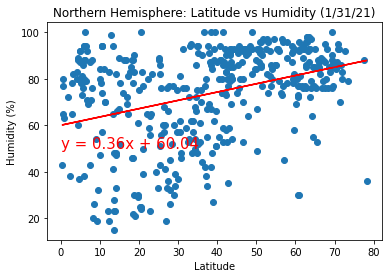

In [160]:
line_regress(north_lats, north_humi)
plt.title("Northern Hemisphere: Latitude vs Humidity (1/31/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../output_data/north_lat_vs_humid.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.46x + 85.02
The r squared is 0.3755993688637467


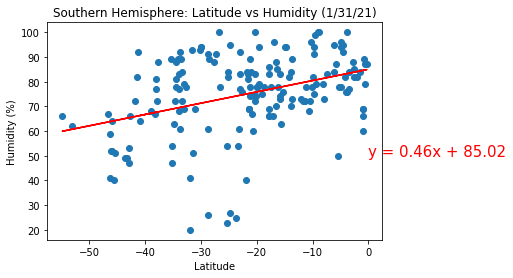

In [159]:
line_regress(south_lats, south_humi)
plt.title("Southern Hemisphere: Latitude vs Humidity (1/31/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../output_data/south_lat_vs_humid.png")
plt.show()

---
# Northern vs Southern - Latitude vs Cloudiness
#### Based on the linear regressions and scatter plots showcased below, we can draw the following conclusions:
    1. There is a weak correlation between latitude and cloudiness in both the northern and southern hemispheres

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.78x + 24.48
The r squared is 0.3870336185379589


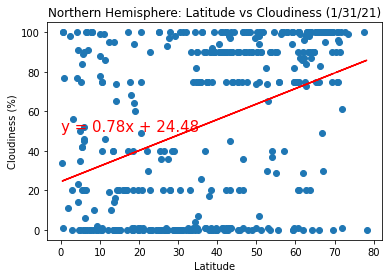

In [158]:
line_regress(north_lats, north_cloud)
plt.title("Northern Hemisphere: Latitude vs Cloudiness (1/31/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("../output_data/north_lat_vs_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.76x + 78.2
The r squared is 0.26600243149061736


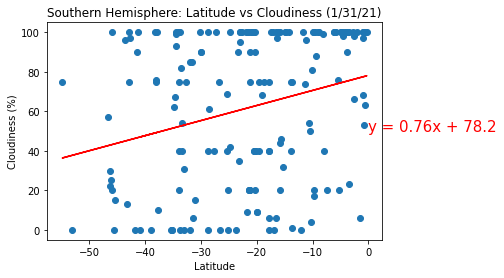

In [157]:
line_regress(south_lats, south_cloud)
plt.title("Southern Hemisphere: Latitude vs Cloudiness (1/31/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("../output_data/south_lat_vs_cloudiness.png")
plt.show()

# Northern vs Southern - Latitude vs Wind Speed
#### Based on the linear regressions and scatter plots showcased below, we can draw the following conclusions:
    1. There is a weak negative correlation between latitude and wind speeds in the southern hemisphere and close to no correlation in the northern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.04x + 6.51
The r squared is 0.12202530866318315


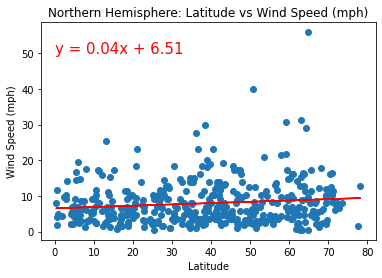

In [155]:
line_regress(north_lats, north_wind)
plt.title("Northern Hemisphere: Latitude vs Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("../output_data/north_lat_vs_wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.11x + 6.9
The r squared is -0.20954303811363334


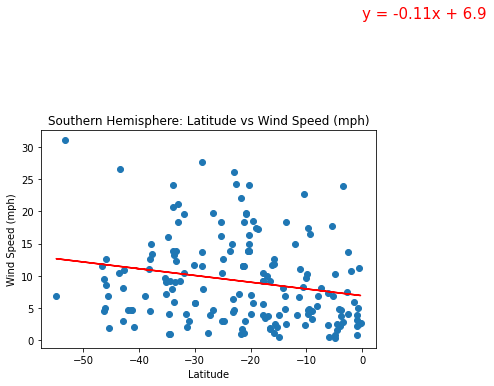

In [156]:
line_regress(south_lats, south_wind)
plt.title("Southern Hemisphere: Latitude vs Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("../output_data/south_lat_vs_wind.png")
plt.show()